In [1]:
import pandas as pd
import numpy as np

df_dataset = pd.read_csv('heatingOilTrainingset.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [2]:
# Data Preparation
df = pd.DataFrame(df_dataset)
df

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [3]:
age = df['Avg_Age'].astype(int)
df['Avg_age1'] = age
df

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size,Avg_age1
0,6,74,132,4,23.8,4,23
1,10,43,263,4,56.7,4,56
2,3,81,145,2,28.0,6,28
3,9,50,196,4,45.1,3,45
4,2,80,131,5,20.8,2,20
...,...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5,58
1214,5,78,129,1,22.5,1,22
1215,5,77,138,3,26.8,1,26
1216,3,89,156,2,34.0,2,34


In [4]:
df = df.rename(columns = {'Avg_age1' : 'avg_age'})
df

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size,avg_age
0,6,74,132,4,23.8,4,23
1,10,43,263,4,56.7,4,56
2,3,81,145,2,28.0,6,28
3,9,50,196,4,45.1,3,45
4,2,80,131,5,20.8,2,20
...,...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5,58
1214,5,78,129,1,22.5,1,22
1215,5,77,138,3,26.8,1,26
1216,3,89,156,2,34.0,2,34


<Axes: >

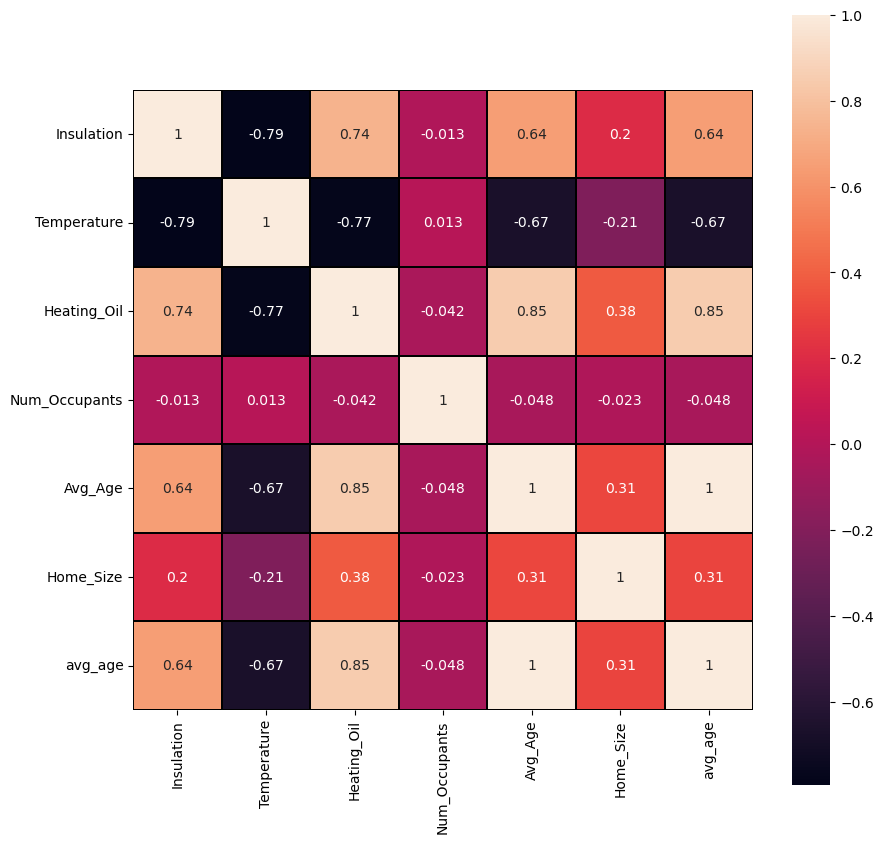

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize = (10, 10))
plt.title = ('Pearson Correlation')
sns.heatmap(df.astype(float).corr(),
            linewidth = 0.25, vmax = 1.0,
            square = True, linecolor = 'black',
            annot = True)

In [6]:
x = df[['Insulation', 'Temperature', 'avg_age', 'Num_Occupants', 'Home_Size']]
x.head()

,Insulation,Temperature,avg_age,Num_Occupants,Home_Size
0,6,74,23,4,4
1,10,43,56,4,4
2,3,81,28,2,6
3,9,50,45,4,3
4,2,80,20,5,2


In [7]:
y = df['Heating_Oil']
y.head()

0    132
1    263
2    145
3    196
4    131
Name: Heating_Oil, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
# Predict Value
y_pred = regressor.predict(x_test)

In [11]:
print(regressor.intercept_)
print(regressor.coef_)

132.7658882301681
[ 2.89168157 -0.8397637   2.06933699 -0.32340788  3.07630658]


In [12]:
print('Mean Absolute Error (MAE) : ', metrics.mean_absolute_error(y_test, y_pred).round(3))
print('Mean Absolute Error (MAE) : ', metrics.mean_absolute_percentage_error(y_test, y_pred).round(3))
print('Mean Square Error (MSE) : ', metrics.mean_squared_error(y_test, y_pred).round(3))
print('Root Mean Square Error (RMSE) : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred).round(3)))
print('r2_score : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE) :  16.131
Mean Absolute Error (MAE) :  0.079
Mean Square Error (MSE) :  584.116
Root Mean Square Error (RMSE) :  24.16849188509701
r2_score :  0.810684965573873


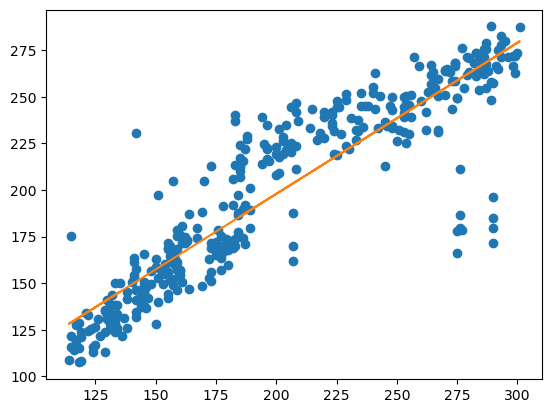

In [13]:
# Visualisasi Grafik
import numpy as np
import matplotlib.pyplot as plt

x = y_test
y = y_pred


plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1) #m = sLope; b = intercept
plt.plot(x, m * x + b)

In [14]:
# Evaluasi Model
data_testing = pd.read_csv('heatingOilTestingset.csv')
data_testing

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [15]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


In [16]:
df_testing = pd.DataFrame(data_testing)

age = df_testing['Avg_Age'].astype(int)
df_testing['avg_age'] = age
df_testing.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,avg_age
0,5,69,10,70.1,7,70
1,5,80,1,66.7,1,66
2,4,89,9,67.8,7,67
3,7,81,9,52.4,6,52
4,4,58,8,22.9,7,22


In [17]:
x1 = df_testing[['Insulation', 'Temperature', 'avg_age', 'Num_Occupants', 'Home_Size']]
x1.head()

,Insulation,Temperature,avg_age,Num_Occupants,Home_Size
0,5,69,70,10,7
1,5,80,66,1,1
2,4,89,67,9,7
3,7,81,52,9,6
4,4,58,22,8,7


In [18]:
testing_pred = regressor.predict(x1)
testing_pred

array([252.43425726, 219.37234011, 226.86269862, ..., 150.13900064,
       250.60546237, 220.50402935])

In [19]:
df_test_predict = pd.DataFrame({'Predicted' : testing_pred})
df_test_predict

,Predicted
0,252.434257
1,219.372340
2,226.862699
3,208.139492
4,160.098617
...,...
42645,243.893210
42646,186.507124
42647,150.139001
42648,250.605462


In [20]:
df_result_predict = pd.concat([df_testing, df_test_predict], 
                              ignore_index=False, sort=False, axis=1)
df_result_predict

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,avg_age,Predicted
0,5,69,10,70.1,7,70,252.434257
1,5,80,1,66.7,1,66,219.372340
2,4,89,9,67.8,7,67,226.862699
3,7,81,9,52.4,6,52,208.139492
4,4,58,8,22.9,7,22,160.098617
...,...,...,...,...,...,...,...
42645,7,63,9,59.1,8,59,243.893210
42646,7,84,1,43.6,5,43,186.507124
42647,2,67,1,27.3,4,27,150.139001
42648,8,58,1,65.7,3,65,250.605462
